# Indicator analysis
Purpose: Find indicator that can be used on get t events

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.momentum import *
from ta.trend import *
from ta.volume import *
from ta.volatility import *

import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [2]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [28]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "bb_"
    for w in windows:
        bb = BollingerBands(df["close"], window=w, window_dev=1.5)
        df["indicator"] = bb.bollinger_pband()
variations([1000])

In [29]:
df

,open,high,low,close,volume,bb_pband_10000,indicator
time,,,,,,,
2017-08-17 04:21:13.356,4261.48,4280.56,4261.48,4266.29,5.002297,NaN,NaN
2017-08-17 04:29:19.766,4266.29,4270.41,4261.32,4267.47,5.356629,NaN,NaN
2017-08-17 04:33:00.057,4261.45,4280.56,4261.45,4267.99,7.935627,NaN,NaN
2017-08-17 04:39:32.027,4296.63,4300.38,4296.63,4300.38,5.027790,NaN,NaN
2017-08-17 04:43:05.191,4300.38,4300.38,4300.38,4300.38,5.109679,NaN,NaN
...,...,...,...,...,...,...,...
2021-06-19 16:27:04.502,35831.71,35844.86,35831.71,35841.54,5.539350,0.639842,-0.130635
2021-06-19 16:27:20.667,35841.57,35841.58,35822.03,35823.32,5.033671,0.622404,-0.177436
2021-06-19 16:27:26.627,35823.32,35833.69,35823.32,35826.83,5.425236,0.625723,-0.165984


In [30]:
i = df.indicator
print(f"max: {max(i[1:].dropna())}")
print(f"min: {min(i[1:].dropna())}")
print(f"mean: {np.mean(i)}")
print(f"median: {np.median(i[1:].dropna())}")

max: 4.555366665321305
min: -4.178239704831036
mean: 0.5143945948162866
median: 0.5315641659507628


In [31]:
indicator = df.indicator.map(lambda x: 1 if x>=1 else 0 if 1>x>=0 else -1)

In [32]:
indicator.to_csv("../data/filter.csv")

In [25]:
new = df.rsi_1000.map(lambda x: (x-40.)/500. if x != None else None)

In [26]:
new.to_csv("../data/indicator.csv")

In [27]:
new

time
2017-08-17 04:21:13.356         NaN
2017-08-17 04:29:19.766         NaN
2017-08-17 04:33:00.057         NaN
2017-08-17 04:39:32.027         NaN
2017-08-17 04:43:05.191         NaN
                             ...   
2021-06-19 16:27:04.502    0.018469
2021-06-19 16:27:20.667    0.018293
2021-06-19 16:27:26.627    0.018328
2021-06-19 16:27:44.405    0.018539
2021-06-19 16:27:48.270    0.018461
Name: rsi_1000, Length: 11798850, dtype: float64

## Plotting

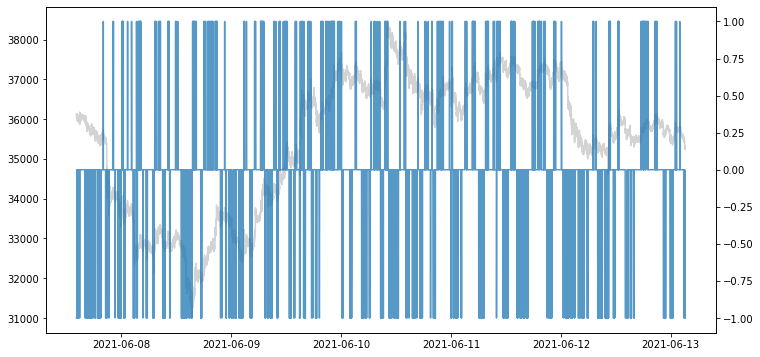

In [33]:
a = -200000
b = -100000
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.close[a:b], color="lightgray")
ax1 = ax.twinx()
ax1.plot(indicator[a:b], alpha=.75)